# Introducción a Altair

[Altair](https://altair-viz.github.io/) es una biblioteca de visualización estadística declarativa para Python. Altair ofrece una gramática de visualización potente y concisa para construir rápidamente una amplia gama de gráficos estadísticos.

Por *declarativo*, queremos decir que puedes proporcionar una especificación de alto nivel de *qué* deseas incluir en la visualización, en términos de *datos*, *marcas en gráficas* y *canales de codificación*, en lugar de tener que especificar *cómo* implementar la visualización en términos de bucles for, comandos de dibujo de bajo nivel, *etc*. La idea clave es declarar enlaces entre campos de datos y canales de codificación visual, como el *x-axis*, *y-axis*, el color, etc. El resto de los detalles del gráfico se manejan automáticamente. Sobre la base de esta idea de gráficos declarativos, se puede crear una sorprendente gama de visualizaciones de simples a sofisticadas utilizando una gramática concisa.


Altair está basado en [Vega-Lite](https://vega.github.io/vega-lite/), una gramática de alto nivel para gráficos interactivos. Altair provee una amigable [API (Application Programming Interface)](https://es.wikipedia.org/wiki/Interfaz_de_programación_de_aplicaciones) para Python que genera especificaciones de Vega-Lite en un formato [JSON (JavaScript Object Notation)](https://es.wikipedia.org/wiki/JSON). Entornos como Jupyter Notebooks, JupyterLab, and Colab pueden tomar esta especificación y rederizarla directamente en el navegador. Para aprender más acerca de la motivación y los conceptos básicos detrás de Altair and Vega-Lite, puedes ver [Vega-Lite presentation video from OpenVisConf 2017](https://www.youtube.com/watch?v=9uaHRWj04D4).

Este notebook te guiará a través de el proceso básico de crear visualizaciones en Altair. Primero, necesitas asegurarte que tienes el paquete de Altair y sus dependencias instalado (para mayores detalles ver [Altair installation documentation](https://altair-viz.github.io/getting_started/installation.html)), o usar un entorno que incluya las dependencias preinstaladas.

_Este notebook es una traduccion y modificación del notebook **"Introduction to Vega-Lite / Altair"** , el cual es parte de [data visualization curriculum](https://github.com/uwdata/visualization-curriculum)._

_Todos los notebooks en español se encuentran en: [Altair en Simplificando Datos](https://github.com/SimplificandoDatos/Altair)_

## Instalación
Para instalar Altair y sus dependencias se debe correr alguno de los siguientes comandos.

***Si usas Jupyter Notebook***

**Usando conda**

`conda install -c conda-forge altair vega_datasets notebook vega`

**Usando pip**

`pip install -U altair vega_datasets notebook vega`

***Si usas Jupyter Lab (esta es la opción recomendada)***

**Usando conda**

`conda install -c conda-forge altair vega_datasets jupyterlab`

**Usando pip**

`pip install -U altair vega_datasets jupyterlab`

***Si usas Google Colab***

No necesitas instalar ni configurar nada

## Importar librerías

Para iniciar, debemos importar las librerías necesarioas: Pandas para *data frames* and Altair para visualización.

In [1]:
import pandas as pd
import altair as alt

## Renderizadores (Renderers)

Dependiendo del entorno de programación, podrías necesitar especificar un [renderizador](https://altair-viz.github.io/user_guide/renderers.html) para Altair.

* Si estás usando __JupyterLab__, __Google Colab__, o __nteract__ no deberías necesitar hacer algo (el renderizador correcto estará habilitado por defecto).
* Si estás usando __Jupyter Notebook__, necesitas habilitar el renderizador para el notebook (abajo las indicaciones).


In [2]:
# Usar esta líneas si usas Jupyter Notebook (no JupyterLab ni google colab)
#alt.renderers.enable('notebook')

## Datos

Datos en Altair son construidos basándose en los "data frame" de Pandas, los cuales consisten en un conjunto de datos llamados *columnas*. Nosotros nos referiremos regularmente a esas *columnas* como *campos*.

Cuando se usa Altair, los datos comunmente se provee como "data frames". Alternativamente, Altair también puede acepter un "URL" para cargar datos accesibles vía red. Como veremos, las columnas con nombres son una pieza esncia para graficas con Altair.

Mayoritariamente, usaremos los datos de el rpositorio [vega-datasets](https://github.com/vega/vega-datasets). Algunos de estos datos están disponibles directamente como "data frames" de Pandas:

In [3]:
from vega_datasets import data  # importar vega_datasets
cars = data.cars()              # Cargar "cars data" como un data frame de Pandas
cars.head()                     # Mostrar las primeras 5 filas

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Los datos en la colección de vega-datasets se puede acceder vía "URL":

In [4]:
data.cars.url

'https://vega.github.io/vega-datasets/data/cars.json'

Las "URL" se puede pasar directamente a Altair (para formatos soportados como JSON y [CSV](https://es.wikipedia.org/wiki/Valores_separados_por_comas)), o cargadas dentro de un "data frame" de Pandas de la siguiente manera:

In [5]:
pd.read_json(data.cars.url).head() # Cargar datos en JSON dentro de un "data frame" de Pandas

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


Para más información acerca de los "data frames" y algunas útiles transformaciones para preparara "data frames" de Pandas para utilizarse con Altair, pueden ver [Specifying Data with Altair documentation](https://altair-viz.github.io/user_guide/data.html).

### Datos de clima

Las visualizaciones estadísticas en Altair comienza con ["tidy"](http://vita.had.co.nz/papers/tidy-data.html) "data frames". Aquí, vamos a iniciar creando un simple "data frame" (`df`) conteniendo la precipitación promedio (`precip`) para una ciudad `city` y un mes `month` dado:

In [6]:
df = pd.DataFrame({
    'city': ['Seattle', 'Seattle', 'Seattle', 'New York', 'New York', 'New York', 'Chicago', 'Chicago', 'Chicago'],
    'month': ['Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec', 'Apr', 'Aug', 'Dec'],
    'precip': [2.68, 0.87, 5.31, 3.94, 4.13, 3.58, 3.62, 3.98, 2.56]
})

df

,city,month,precip
0,Seattle,Apr,2.68
1,Seattle,Aug,0.87
2,Seattle,Dec,5.31
3,New York,Apr,3.94
4,New York,Aug,4.13
5,New York,Dec,3.58
6,Chicago,Apr,3.62
7,Chicago,Aug,3.98
8,Chicago,Dec,2.56


## El Objeto Chart (Gráfica)

El objeto fundamental en Altair es `Chart`, el cual toma un "data frame" como su único argumento:

In [7]:
chart = alt.Chart(df)

Hasta ahora hemos definido el objeto `Chart` y pasado a este el "data frame" que creamos anteriormente. Todavía no le hemos dicho a "chart" *qué hacer* con los datos.

## Marks and Encodings (Marcadores y codificadores)

Teniendo el objeto `Chart`, ahora podemos especificar como queremos visualizar los datos. Primero indicaremos que tipo de *mark (marcador)* queremos usar para representar los datos. Podemos ajustar el atributo `mark` del objeto `chart` usando el método `Chart.mark_*`.

Por ejemplo, podemos mostrar los datos como puntos, usando `Chart.mark_point()`:

In [8]:
alt.Chart(df).mark_point()

Aquí el renderizado consiste en un punto por fila en el conjunto de datos, todos trazados uno encima del otro, ya que aún no hemos especificado posiciones para estos puntos.

Para separar visualmente los puntos, podemos asignar varios *canales de codificación (encoding channels)*, o *canales (channels)* para abreviar, a campos en el conjunto de datos. Por ejemplo, podríamos *codificar (encode)* el campo `city` de los datos utilizando el canal `y`, que representa la posición de los puntos en el eje y. Para especificar esto, usamos el método `encode`:

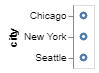

In [9]:
alt.Chart(df).mark_point().encode(
  y='city',
)

El método `encode()` crea una asignación de tipo clave-valor (key-value) entre canales de codificación (como `x`, `y`, `color`, `shape`, `size`, *etc.*) a los campos del conjunto de datos, al que se accede por el nombre del campo. Para los *data frames* de Pandas, Altair determina automáticamente un tipo de datos apropiado para la columna asignada, que en este caso es el tipo *nominal*, lo que indica valores categóricos no ordenados.

Aunque hemos separado los datos por un atributo, todavía tenemos varios puntos superpuestos dentro de cada categoría. Separemos aún más estos mediante la adición de un canal de codificación `x`, asignado al campo `'precip'`:

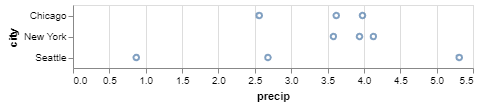

In [10]:
alt.Chart(df).mark_point().encode(
    x='precip',
    y='city'
)

_¡Seattle exhibe ambos, los meses menos lluviosos y los más lluviosos!_

Altair deduce automáticamente el tipo de datos del campo `'precip'`, y esta vez se trata como un tipo *cuantitativo (quantitative)* (es decir, un número real). Vemos que las líneas de cuadrícula y los títulos apropiados de los ejes también se agregan automáticamente.

Arriba hemos especificado pares clave-valor (key-value) utilizando argumentos de palabras clave (keyword), `x = 'precip'`. Además, Altair proporciona métodos de construcción para codificar definiciones, utilizando la sintaxis `alt.X('precip')`. Esta alternativa es útil para proporcionar más parámetros a una codificación, como veremos más adelante en este *notebook*.

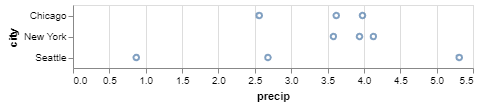

In [11]:
alt.Chart(df).mark_point().encode(
    alt.X('precip'),
    alt.Y('city')
)

Los dos estilos de especificar codificaciones se pueden intercalar: `x='precip', alt.Y('city')` también es una entrada válida a la fución `encode`.

En los ejemplos anteriores, el tipo de datos para cada campo se infiere automáticamente en función de su tipo dentro del *data frame* de Pandas. También podemos indicar explícitamente el tipo de datos a Altair anotando el nombre del campo:

- `'b:N'` indica un tipo *nominal* (datos categóricos no ordenados),
- `'b:O'` indica un tipo *ordinal* (datos ordenados por rango),
- `'b:Q'` indica un tipo *cuantitativo* (datos numéricos con magnitudes significativas), y
- `'b:T'` ndica un tipo *temporal* (datos de fecha/hora)

La anotación explícita de los tipos de datos es necesaria cuando los datos se cargan directamente desde una *URL* externa de Vega-Lite (omitiendo Pandas por completo), o cuando deseamos utilizar un tipo que difiera del tipo que se infirió automáticamente.

¿Qué crees que pasará con nuestro gráfico anterior si tratamos a `precip` como una variable nominal u ordinal, en lugar de una variable cuantitativa? _¡Modifica el código de arriba y descúbrelo! _

Echaremos un vistazo más de cerca a los tipos de datos y canales de codificación en el próximo notebook.

## Transformación de datos: Agregación (*Aggregation*)

Para permitir más flexibilidad en la cómo los datos son visualizados, Altair tiene una sintaxis incorporada para *aggregation* de datos. Por ejemplo, podemos calcular el promedio de todos los valores, especificando una función de *aggregation* junto con el nombre del campo:

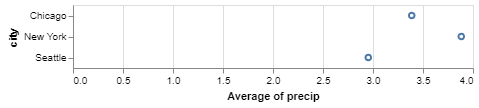

In [12]:
alt.Chart(df).mark_point().encode(
    x='average(precip)',
    y='city'
)

Ahora, dentro de cada categoría del eje x, vemos un único punto que refleja el *promedio (average)* de los valores dentro de esa categoría.

_¿Tiene Seattle realmente la precipitación media más baja de estas ciudades? (¡Así es!) Aun así, ¿cómo podría esta gráfica inducir a error? ¿Qué meses están incluidos? ¿Qué se considera precipitación?_

Altair soporta una variedad de funciones de agregación, incluyendo `count` (conteo), `min` (mínimo), `max` (máximo), `average` (promedio), `median` (mediana) y `stdev` (desviación estándar). En un notebook posterior, haremos un recorrido por las transformaciones de datos, incluyendo la agregación, clasificación, filtrado y creación de nuevos campos derivados utilizando fórmulas.

## Cambiando el tipo de marcador (*Mark*)

Digamos que queremos representar nuestros valores agregados usando barras rectangulares en lugar de puntos. Podemos realizarlos, reemplazando `Chart.mark_point` por `Chart.mark_bar`:

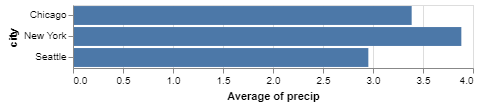

In [13]:
alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city'
)

Debido a que el campo nominal `city` está asignado al eje `y`, el resultado es una barra horizontal. Para conseguir una gáfica de barra vertical, simplemente intercambiamos lo colocado en `x` y `y`:

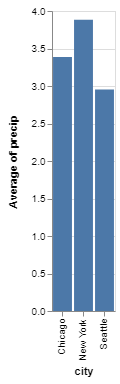

In [14]:
alt.Chart(df).mark_bar().encode(
    x='city',
    y='average(precip)'
)

## Personalizando una visualización

Por defecto, Altair/ Vega-Lite decide acerca de las propiedades de la visualización; pero esto puede cambiarse usando métodos para personalizar el aspecto de la visulazación. Por ejemplo, podemos especificar los títulos de los ejes usando el atributo `axis` de las clases de canal, podemos modificar las propiedades de las escalas usando el atributo `scale`, y podemos especificar el color de las marcas (*marks*) ajustando el *keyword* `color` de el método `Chart.mark_*` a cualquier [Código de color CSS](https://htmlcolorcodes.com/es/nombres-de-los-colores):

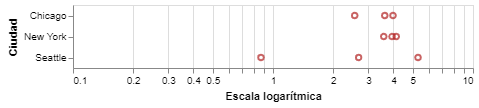

In [15]:
alt.Chart(df).mark_point(color='firebrick').encode(
  alt.X('precip', scale=alt.Scale(type='log'), axis=alt.Axis(title='Escala logarítmica')),
  alt.Y('city', axis=alt.Axis(title='Ciudad')),
)

En un próximo módulo exploraremos las distintas opciones disponibles para escalas, ejes y leyendas para crear una gráfica personalizada.

## Multiples vistas

Como vimos anteriormente, el objeto `Chart` representa una gráfica con un único tipo de marcador. ¿Qué sucede con diagramas más complicados, que incluyen varias gráficas o capas? Usando un conjunto de operadores *view composition*, Altair, toma múltiples definiciones de gráficas y las combina para crear vistas más complejas.

Como punto inicial, grafiquemos el conjunto de datos `cars` en una línea que muestra el promedio del millaje por año de fabricación:

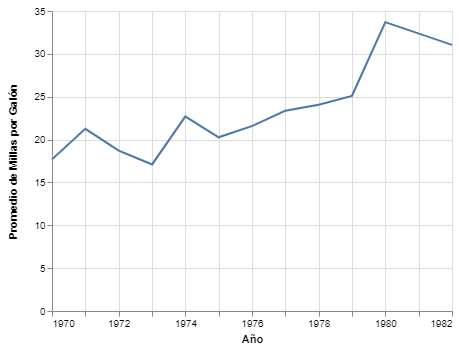

In [16]:
alt.Chart(cars).mark_line().encode(
    alt.X('Year', axis=alt.Axis(title='Año')),
    alt.Y('average(Miles_per_Gallon)', axis=alt.Axis(title='Promedio de Millas por Galón'))
)

Para aumentar este gráfico, podríamos añadir marcadores del tipo `circle` para cada promedio. (El marcador `circle` es sólo una forma conveniente de abreviar el marcador `point` que utilizan círculos rellenos.)

Podemos comenzar por definir cada gráfica separadamente: primero una gráfica de línea y luego una de dispersión (*scatter*). Luego podemos usar el operador `layer` para combinar las dos en una gráfica por capas. Aquí podemos usar el operado `+` para invocar el uso de capas:

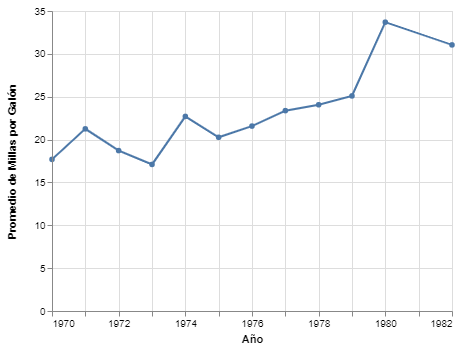

In [17]:
line = alt.Chart(cars).mark_line().encode(
    alt.X('Year', axis=alt.Axis(title='Año')),
    alt.Y('average(Miles_per_Gallon)', axis=alt.Axis(title='Promedio de Millas por Galón'))
)

point = alt.Chart(cars).mark_circle().encode(
    alt.X('Year'),
    alt.Y('average(Miles_per_Gallon)')
)

line + point

¡También podemos crear esta gráfica *reusando* y *modificando* una definición previa de una gráfica! En lugar de reescribir por completo una gráfica, podemos iniciar con la gráfica de línea y luego invocar el método `mark_point` para generar una nueva definición de la gráfica con un tipo diferente de marcador (*mark*):

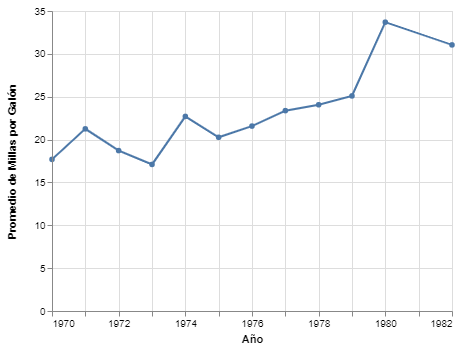

In [18]:
mpg = alt.Chart(cars).mark_line().encode(
    alt.X('Year', axis=alt.Axis(title='Año')),
    alt.Y('average(Miles_per_Gallon)', axis=alt.Axis(title='Promedio de Millas por Galón'))
)

mpg + mpg.mark_circle()

<em>(La necesidad de colocar puntos en una línea es muy común, el marcado `line`también incluye una forma abreviada para generar una nueva capa por ti. ¡Intentando añadir el argumento `point=True` al método `mark_line`!)</em>

Ahora, ¿Qué pasaría si quisiseramos ver esta gráfica a la par de otra, como el promedio de los caballos de fuerza (*horsepower*) en el tiempo?

Podemos usar operadores de concatenación (*concatenation*) para colocar varias gráficas "lado a lado", ya sea vertical u horizontalmente. Aquí, usaremos el operador `|` para realizar una concatenación horizontal de dos gráficas:

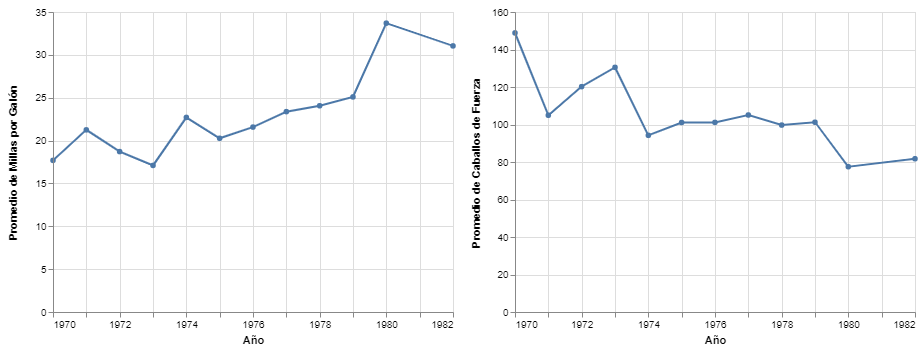

In [19]:
hp = alt.Chart(cars).mark_line().encode(
    alt.X('Year', axis=alt.Axis(title='Año')),
    alt.Y('average(Horsepower)', axis=alt.Axis(title='Promedio de Caballos de Fuerza'))
)

(mpg + mpg.mark_circle()) | (hp + hp.mark_circle())

_Observamos que , en este dataset, de los 70 a los primeros años de los 80, en promedio a mejorado la eficiencia de consumo de combustible mientra que ha disminuido el promedio de los caballos de fuerza._

En un notebook posterior nos concentraremos en *view composition*, incluyendo no únicamente las capas y la concatenación, sino también el operador `facet` para dividar los datos en subgráficas y el operador `repeat` para generar de forma concisa gráficas desde una plantilla.

## Gráficas interactivas

Además del graficado básico y la composición de visualizaciones, una de las características más emocionantes de Altair y Vega-Lite es su soporte para la interacción.

Para crear un gráfico interactivo simple que soporte el desplazamiento (*panning*) y el enfoque (*zooming*), podemos invocar el método `interactive()` del objeto `Chart`. En la siguiente gráfica, haga clic y arrastre para desplazar (*pan*) o utilice la rueda de desplazamiento del ratón para alejar o acercar (*zoom*):

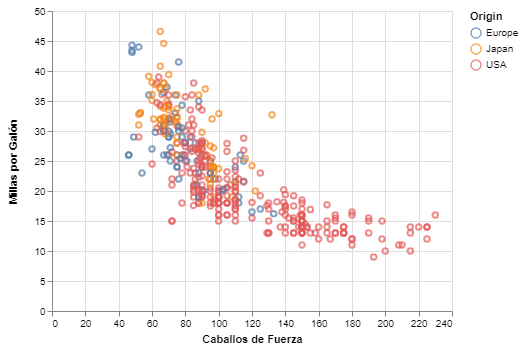

In [20]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', axis=alt.Axis(title='Caballos de Fuerza')),
    alt.Y('Miles_per_Gallon', axis=alt.Axis(title='Millas por Galón')),
    color='Origin'
).interactive()

Para dotar de mayor detalle cuando se desplaza el ratón sobre la gráfica, podemos usar el canal de codificación (*encoding*) `tooltip`:

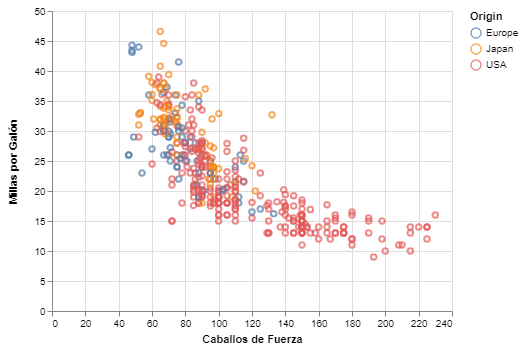

In [21]:
alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', axis=alt.Axis(title='Caballos de Fuerza')),
    alt.Y('Miles_per_Gallon', axis=alt.Axis(title='Millas por Galón')),
    color='Origin',
    tooltip=['Name', 'Origin'] # muestra "Name" y "Origin" en un "tooltip"
).interactive()

Para interacciones más complejas, como gráficas vinculadas y filtrado cruzado, Altair proporciona una abstracción de *selección* para definir selecciones interactivas y luego vincularlas a los componentes de un gráfico. Cubriremos esto en detalle en un notebook posterior.

A continuación se presenta un ejemplo más complejo. El histograma superior muestra el número de coches por año y utiliza una selección interactiva para modificar la opacidad de los puntos en el gráfico de dispersión inferior, que muestra los caballos de fuerza frente al millaje.

_Seleccione un intervalo en el gráfico superior y vea cómo afecta a los puntos del gráfico inferior. Al examinar el código,¡**No se preocupe si el código no tiene sentido todavía!** Este es un ejemplo de motivación y revisaremos todos los detalles necesarios en el transcurso de los diferentes notebooks._

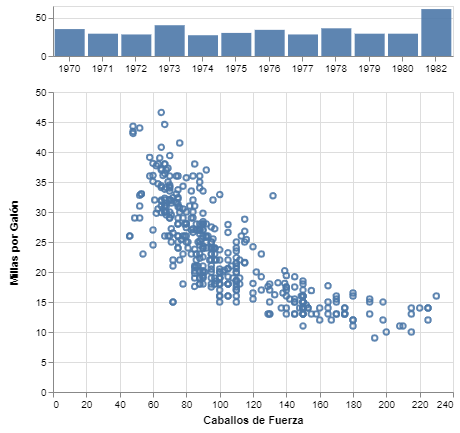

In [22]:
# crear un "brush selection" de intervalos sobre una codificación del eje x
brush = alt.selection_interval(encodings=['x'])

# determinar la opacidad en base al "brush selection"
opacity = alt.condition(brush, alt.value(0.9), alt.value(0.1))

# un histograma general de los coches por año
# añade el barrido de intervalos para seleccionar los coches a lo largo del tiempo

overview = alt.Chart(cars).mark_bar().encode(
    alt.X('Year:O', timeUnit='year',   # extrae "year" unit, tratar como ordinal
      scale=alt.Scale(rangeStep=None), # subdividir el ancho por defecto de la gráfica
      axis=alt.Axis(title=None, labelAngle=0) # no colocar "title", sin "label angle"
    ),
    alt.Y('count()', title=None), # Contar, no colocar "axis title"
    opacity=opacity
).add_selection(
    brush     # añadir "brush selection" a la gráfica
).properties(
    height=50 # ajustar la altura por defecto de la gráfica a 50 pixels
)

# una  detallada gráfica de dispersión de caballos de fuerza vs. millaje
# modular la opacidad de los puntos en base a la "brush selection"
detail = alt.Chart(cars).mark_point().encode(
    alt.X('Horsepower', axis=alt.Axis(title='Caballos de Fuerza')),
    alt.Y('Miles_per_Gallon', axis=alt.Axis(title='Millas por Galón')),
    # set opacity based on brush selection
    opacity=opacity
)

# vertically concatenate (vconcat) charts using the '&' operator
graf = overview & detail
graf

## Apéndice: Examen de la salida JSON

Como API de Python para Vega-Lite, el propósito principal de Altair es convertir las especificaciones de los gráficos en una cadena JSON que se ajuste al esquema de Vega-Lite. Usando el método `Chart.to_json`, podemos inspeccionar la especificación JSON que Altair está exportando y enviando a Vega-Lite:

In [23]:
chart = alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city',
)
print(chart.to_json())

{
  "$schema": "https://vega.github.io/schema/vega-lite/v2.6.0.json",
  "config": {
    "view": {
      "height": 300,
      "width": 400
    }
  },
  "data": {
    "name": "data-fdfbb22e8e0e89f6556d8a3b434b0c97"
  },
  "datasets": {
    "data-fdfbb22e8e0e89f6556d8a3b434b0c97": [
      {
        "city": "Seattle",
        "month": "Apr",
        "precip": 2.68
      },
      {
        "city": "Seattle",
        "month": "Aug",
        "precip": 0.87
      },
      {
        "city": "Seattle",
        "month": "Dec",
        "precip": 5.31
      },
      {
        "city": "New York",
        "month": "Apr",
        "precip": 3.94
      },
      {
        "city": "New York",
        "month": "Aug",
        "precip": 4.13
      },
      {
        "city": "New York",
        "month": "Dec",
        "precip": 3.58
      },
      {
        "city": "Chicago",
        "month": "Apr",
        "precip": 3.62
      },
      {
        "city": "Chicago",
        "month": "Aug",
        "precip": 3.

Note aquí que`encode(x='average(precip)')` fue expandido a una estructura JSON con un nombre de `field`, un `type` para los datos, e incluye un campo `aggregate`. El `encode(y='city')` se ha expandido de manera similar.

Como vimos anteriormente, la sintaxis abreviada de Altair incluye también una manera de especificar el tipo del campo

In [24]:
x = alt.X('average(precip):Q')
print(x.to_json())

{
  "aggregate": "average",
  "field": "precip",
  "type": "quantitative"
}


Este método abreviado es equivalente a deletrear los atributos por nombre:

In [25]:
x = alt.X(aggregate='average', field='precip', type='quantitative')
print(x.to_json())

{
  "aggregate": "average",
  "field": "precip",
  "type": "quantitative"
}


## Publicando una visualización

Una vez ya has visualizado tus datos, quizás te gustaría publicarlos en algún lugar de la red. Estos puede realizarse fácilmente usando el paquete [vega-embed JavaScript](https://github.com/vega/vega-embed). Un ejemplo simple de como crear un archivo HTML  para cualquier gráfica usando el método`Chart.save`:

```python
chart = alt.Chart(df).mark_bar().encode(
    x='average(precip)',
    y='city',
)
chart.save('chart.html')
```


La plantilla básica HTML produce una salida que luce como esto, donde las especificaciones JSON para tu gráfico producido por `Chart.to_json` debería ser almacenado en la variable `spec`de JavaScript:

```html
<!DOCTYPE html>
<html>
  <head>
    <script src="https://cdn.jsdelivr.net/npm/vega@5"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-lite@3"></script>
    <script src="https://cdn.jsdelivr.net/npm/vega-embed@4"></script>
  </head>
  <body>
    <div id="vis"></div>
    <script type="text/javascript">
    var spec = {};  /* JSON output for your chart's specification */
    var opt = {"renderer": "canvas", "actions": false};  /* Options for the embedding */
    vegaEmbed("#vis", spec, opt);
    </script>
  </body>
</html>
 ```

El método `Chart.save` provee de una forma conveniente de almacenar ese HTML como un archivo. Para obtener más información sobre la integración de Altair/Vega-Lite, ver la [documentación del proyecto vega-embed](https://github.com/vega/vega-embed).


In [26]:
# Este es el documento creado
graf.save('chart.html')

## Próximos pasos

¡🎉 Urra, has completado la introducción a Altair! En el próximo notebook, profundizaremos en la creación de visualizaciones usando los modelos de tipos de datos de Altair, marcadores de gráficas y canales de codificación visual